<a href="https://colab.research.google.com/github/yb-whilelearning/PythonProjects__ML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In the case of a single example, 𝑧
is scalar.
in the case of multiple examples, 𝑧
may be a vector consisting of 𝑚
values, one for each example.
The implementation of the sigmoid function should cover both of these potential input formats.
NumPy has a function called exp(), which offers a convenient way to calculate the exponential ( 𝑒𝑧) of all elements in the input array (z).

It also works with a single number as an input, as shown below.


In [19]:
# Input is an array.
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.718  7.389 20.086]
Input to exp: 1
Output of exp: 2.718281828459045


Let us start implementing the sigmoid function directly: But remember we arent doing z= wx+b /Regression yet. This is simple sigmoid (to be edited later)

In [20]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))

    return g

Some terms:
np.arange() is a function in NumPy.
It creates an array of numbers with evenly spaced values within a specified range.

It’s like Python’s built-in range(), but it returns a NumPy array instead of a plain Python list — and it can handle decimal steps too.

np.arange() is handy for quickly generating ranges — but for precise decimal spacing, np.linspace() is often better because it includes the end point and avoids rounding issues.

What does np.set_printoptions(precision=3) do?

This tells NumPy:
👉 “When you print arrays, show decimal numbers rounded to 3 decimal places.”
And why do we need it?
By default, NumPy might show lots of decimals — which can clutter your output.
This makes printed arrays cleaner and easier to read.

What does np.c do?
It stacks arrays side-by-side as columns.

In [21]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


Text(0.5, 0, 'z')

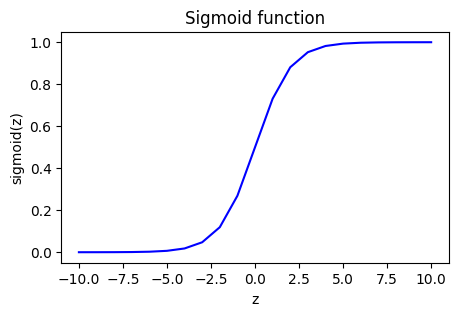

In [22]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')


Applying logistic regression to the categorical data example of tumor classification.

* The input variable X is a numpy array which has 6 training examples, each with two features
* The output variable y is also a numpy array with 6 examples, and y is either 0 or 1

A short note on reshape:
-1 tells NumPy: “Figure out this dimension automatically, based on the data length.”
Here, you have 6 elements → so -1 becomes 6.

1 means: “One column.”

In machine learning, especially in linear regression or classification, labels y are usually expected to be 2D (with shape (n_samples, 1)), so they can match the math of matrix operations.

If you keep it as a 1D array:
It might work for some operations, but can break matrix multiplication later.

| Array             | Shape    | What it means                                    |
| ----------------- | -------- | ------------------------------------------------ |
| `[0, 1, 1]`       | `(3,)`   | Just a flat list — *not clearly rows vs columns* |
| `[[0], [1], [1]]` | `(3, 1)` | A clear **column vector** — one value per row    |

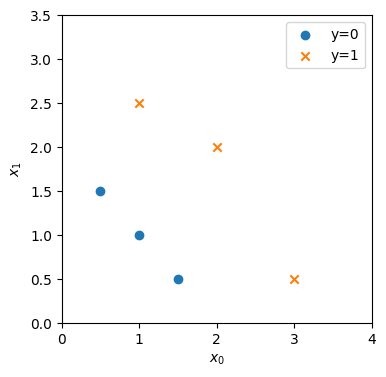

In [23]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

fig,ax = plt.subplots(1,1,figsize=(4,4))

# Scatter plot: color by label
# Assumes:
# - X is shape (n_samples, 2)
# - y is shape (n_samples, 1) or (n_samples,)
ax.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], label='y=0', marker='o')
ax.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], label='y=1', marker='x')

# Axis limits & labels
ax.axis([0, 4, 0, 3.5])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')

ax.legend()
plt.show()

Suppose you'd like to train a logistic regression model on this data which has the form

𝑓(𝑥)=𝑔(𝑤0𝑥0+𝑤1𝑥1+𝑏)

where 𝑔(𝑧)=11+𝑒−𝑧

    , which is the sigmoid function

    Let's say that you trained the model and get the parameters as 𝑏=−3,𝑤0=1,𝑤1=1

. That is,

𝑓(𝑥)=𝑔(𝑥0+𝑥1−3)

w.x will be a dot product for multiple features, remember

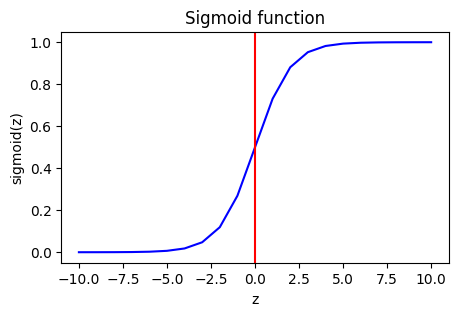

In [28]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
ax.axvline(x=0, color='red', linestyle='-', label='Decision boundary')


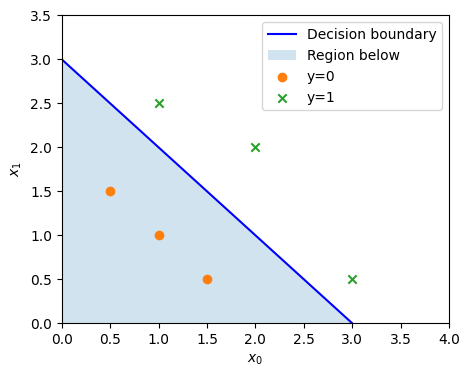

In [31]:
# Choose values between 0 and 6


x0 = np.arange(0, 6)
x1 = 3 - x0

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# Plot the decision boundary line
ax.plot(x0, x1, color="blue", label='Decision boundary')

# Fill the region below the line
ax.fill_between(x0, x1, alpha=0.2, label='Region below')

# Plot the original data (replace plot_data)
y_flat = y.flatten()
ax.scatter(X[y_flat == 0, 0], X[y_flat == 0, 1], label='y=0', marker='o')
ax.scatter(X[y_flat == 1, 0], X[y_flat == 1, 1], label='y=1', marker='x')

# Axis limits & labels
ax.axis([0, 4, 0, 3.5])
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.legend()

plt.show()

In the plot above, the blue line represents the line 𝑥0+𝑥1−3=0 and it should intersect the x1 axis at 3 (if we set 𝑥1 = 3, 𝑥0 = 0) and the x0 axis at 3 (if we set 𝑥1 = 0, 𝑥0

    = 3).

    The shaded region represents −3+𝑥0+𝑥1<0

. The region above the line is −3+𝑥0+𝑥1>0

    .

    Any point in the shaded region (under the line) is classified as 𝑦=0

. Any point on or above the line is classified as 𝑦=1

    . This line is known as the "decision boundary".

As we've seen in the lectures, by using higher order polynomial terms (eg: 𝑓(𝑥)=𝑔(𝑥20+𝑥1−1)
, we can come up with more complex non-linear boundaries